In [ ]:
# Data Loading


import pandas as pd

operator_tracking = pd.read_csv('D:\case study/operator_tracking.csv')
styles_operation_list= pd.read_csv('D:\case study/styles_operation_list.csv')

print("operator_tracking Data :")
print(operator_tracking.head(10))


In [37]:
print("\nStyles Operation LsitData:")
print(styles_operation_list.head(10))


Styles Operation LsitData:
       id  style_id  operation_id  sort_order    sam  rate  machine_id
0  111743      5292            30         940  48.63   0.0         651
1  208151      5542          3207           0   0.70   0.0         156
2  208152      5542          3206           0   0.56   0.0         156
3  208153      5542          3205           0   0.56   0.0         156
4  208154      5542            30           0   1.10   0.0         156
5  208155      5542         12134           0   2.00   0.0         156
6  208366      5542         31950           0   0.60   0.0         421
7  208367      5542         31951           0   0.50   0.0         422
8  208368      5542         31870           0   0.27   0.0         435
9  208369      5542         29339           0   0.24   0.0         421


# Merge Data

In [113]:
merged_data = pd.merge(operator_tracking, styles_operation_list, on='operation_id')



# Distribution Analysis

In [115]:
import matplotlib.pyplot as plt


avg_total_time_per_operator = merged_data.groupby('operator_id')['total_time'].mean()
avg_break_time_per_operator = merged_data.groupby('operator_id')['break_time'].mean()
avg_off_standard_time_per_operator = merged_data.groupby('operator_id')['off_standard_time'].mean()
sorted_operations = merged_data.sort_values(by='sort_order')

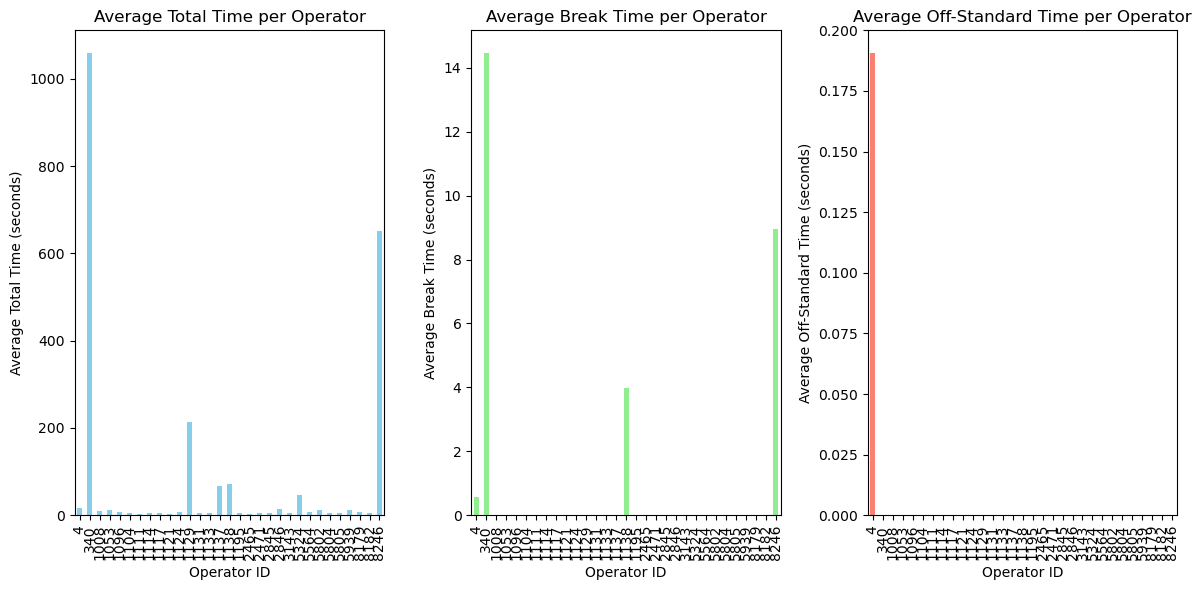

In [116]:
# Plotting


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
avg_total_time_per_operator.plot(kind='bar', color='skyblue')
plt.title('Average Total Time per Operator')
plt.xlabel('Operator ID')
plt.ylabel('Average Total Time (seconds)')

plt.subplot(1, 3, 2)
avg_break_time_per_operator.plot(kind='bar', color='lightgreen')
plt.title('Average Break Time per Operator')
plt.xlabel('Operator ID')
plt.ylabel('Average Break Time (seconds)')

plt.subplot(1, 3, 3)
avg_off_standard_time_per_operator.plot(kind='bar', color='salmon')
plt.title('Average Off-Standard Time per Operator')
plt.xlabel('Operator ID')
plt.ylabel('Average Off-Standard Time (seconds)')

plt.tight_layout()
plt.show()

# Operation Sequencing Evaluation

In [47]:
import seaborn as sns

sorted_operations = merged_data.sort_values(by='sort_order')

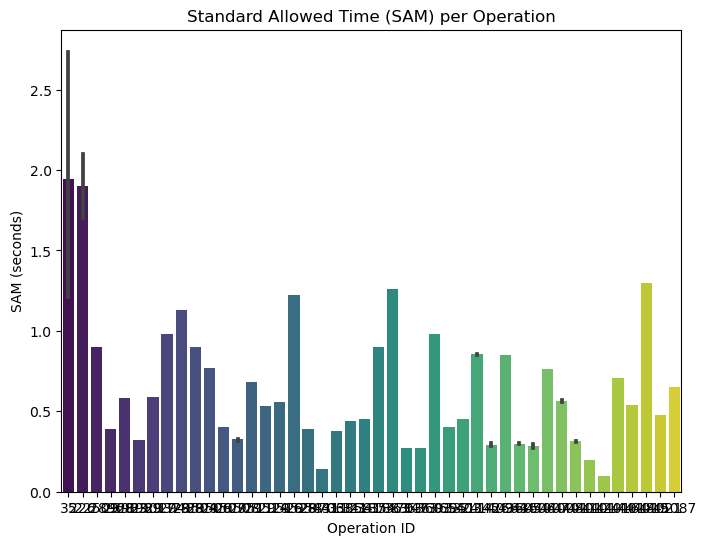

In [48]:
# Plotting

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_operations['operation_id'], y=sorted_operations['sam'], palette='viridis')
plt.title('Standard Allowed Time (SAM) per Operation')
plt.xlabel('Operation ID')
plt.ylabel('SAM (seconds)')
plt.show()

In [112]:
# Performance Metrics Analysis

total_time_per_operator = merged_data.groupby('operator_id')['total_time'].sum()
break_time_per_operator = merged_data.groupby('operator_id')['break_time'].sum()
off_standard_time_per_operator = merged_data.groupby('operator_id')['off_standard_time'].sum()


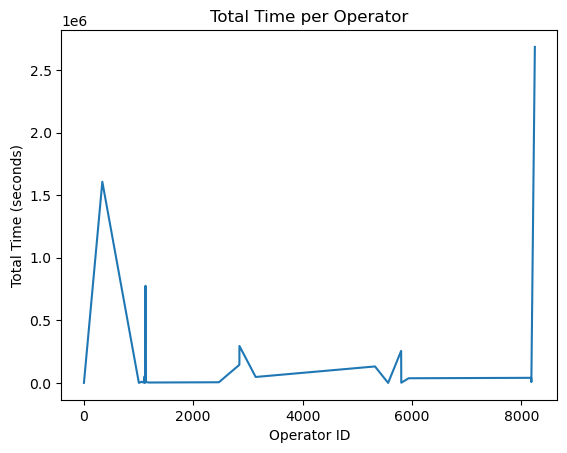

In [105]:
plt.plot(total_time_per_operator.index, total_time_per_operator.values)
plt.title('Total Time per Operator')
plt.xlabel('Operator ID')
plt.ylabel('Total Time (seconds)')
plt.show()

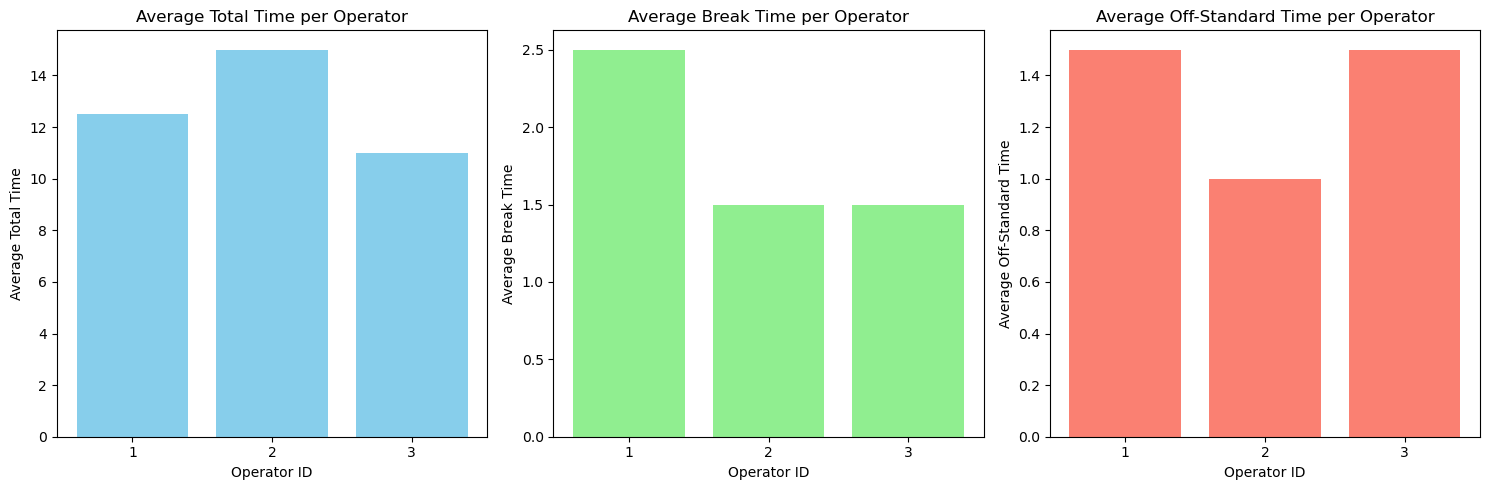

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


def analyze_production_efficiency(operator_tracking_data, style_operation_data):
    # Your analysis code here
    # This function should calculate the required metrics and return them

    
    avg_total_time_per_operator = operator_tracking_data.groupby('operator_id')['total_time'].mean()
    avg_break_time_per_operator = operator_tracking_data.groupby('operator_id')['break_time'].mean()
    avg_off_standard_time_per_operator = operator_tracking_data.groupby('operator_id')['off_standard_time'].mean()

    return avg_total_time_per_operator, avg_break_time_per_operator, avg_off_standard_time_per_operator

   #input data (replace with your actual data)
operator_tracking_data = pd.DataFrame({
    'operator_id': [1, 1, 2, 2, 3, 3],
    'total_time': [10, 15, 12, 18, 9, 13],
    'break_time': [2, 3, 1, 2, 2, 1],
    'off_standard_time': [1, 2, 1, 1, 2, 1]
})

style_operation_data = pd.DataFrame({
    'operator_id': [1, 2, 3],
    # Other columns...
})

# Call the analyze_production_efficiency function
result = analyze_production_efficiency(operator_tracking_data, style_operation_data)

# Unpack the results
avg_total_time_per_operator, avg_break_time_per_operator, avg_off_standard_time_per_operator = result

# Get all operator IDs
all_operator_ids = set(operator_tracking_data['operator_id'])

# Plotting the results for all operator IDs
plt.figure(figsize=(15, 5))

# Plot Average Total Time per Operator
plt.subplot(1, 3, 1)
plt.bar(avg_total_time_per_operator.index.astype(str), avg_total_time_per_operator.values, color='skyblue')
plt.xlabel('Operator ID')
plt.ylabel('Average Total Time')
plt.title('Average Total Time per Operator')

# Plot Average Break Time per Operator
plt.subplot(1, 3, 2)
plt.bar(avg_break_time_per_operator.index.astype(str), avg_break_time_per_operator.values, color='lightgreen')
plt.xlabel('Operator ID')
plt.ylabel('Average Break Time')
plt.title('Average Break Time per Operator')

# Plot Average Off-Standard Time per Operator
plt.subplot(1, 3, 3)
plt.bar(avg_off_standard_time_per_operator.index.astype(str), avg_off_standard_time_per_operator.values, color='salmon')
plt.xlabel('Operator ID')
plt.ylabel('Average Off-Standard Time')
plt.title('Average Off-Standard Time per Operator')

plt.tight_layout()
plt.show()

Operator Tracking Columns: Index(['id', 'operator_id', 'operation_id', 'date', 'bundle_number',
       'style_id', 'floor_id', 'line_id', 'complete_piece', 'total_time',
       'break_time', 'off_standard_time'],
      dtype='object')
Styles Operation List Columns: Index(['id', 'style_id', 'operation_id', 'sort_order', 'sam', 'rate',
       'machine_id'],
      dtype='object')
Merged Data Columns: Index(['id_x', 'operator_id', 'operation_id_x', 'date', 'bundle_number',
       'style_id', 'floor_id', 'line_id', 'complete_piece', 'total_time',
       'break_time', 'off_standard_time', 'id_y', 'operation_id_y',
       'sort_order', 'sam', 'rate', 'machine_id'],
      dtype='object')


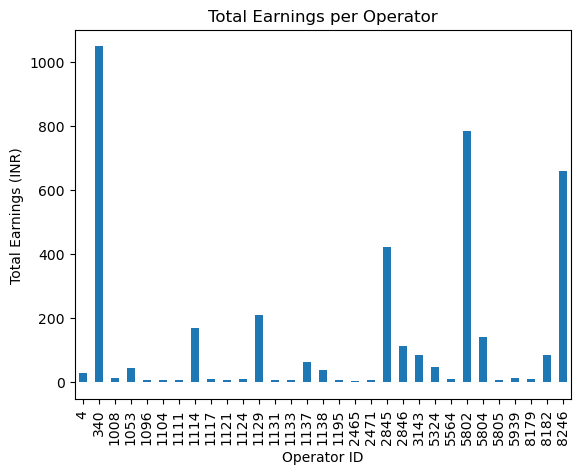

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


operator_tracking = pd.read_csv('D:\case study/operator_tracking.csv')
styles_operation_list= pd.read_csv('D:\case study/styles_operation_list.csv')

# Display column names to check for discrepancies
print("Operator Tracking Columns:", operator_tracking.columns)
print("Styles Operation List Columns:", styles_operation_list.columns)

# Merge operator tracking data with styles operation list
merged_data = pd.merge(operator_tracking, styles_operation_list, on='style_id', how='left')

# Check if merge was successful
print("Merged Data Columns:", merged_data.columns)

# Calculate idle time
merged_data['idle_time'] = merged_data['total_time'] - merged_data['break_time'] - merged_data['off_standard_time'] - (merged_data['complete_piece'] * merged_data['sam'])

# Calculate earnings per operation
merged_data['earnings'] = merged_data['complete_piece'] * merged_data['rate']

# Analyze idle time distribution
idle_time_stats = merged_data.groupby('operator_id')['idle_time'].mean()

# Analyze operational sequence efficiency
operation_sequence_efficiency = merged_data.groupby('operator_id')['total_time'].mean()

# Analyze earnings per operator
earnings_per_operator = merged_data.groupby('operator_id')['earnings'].sum()

# Visualize findings
# Plot idle time distribution
idle_time_stats.plot(kind='bar', title='Average Idle Time per Operator')

# Plot operational sequence efficiency
operation_sequence_efficiency.plot(kind='bar', title='Average Time per Operation')

# Plot earnings per operator
earnings_per_operator.plot(kind='bar', title='Total Earnings per Operator')

# Plot earnings per operator
earnings_per_operator.plot(kind='bar', title='Total Earnings per Operator')
plt.xlabel('Operator ID')
plt.ylabel('Total Earnings (INR)')
plt.show()

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the provided data
operator_tracking = pd.read_csv('D:\case study/operator_tracking.csv')
styles_operation_list= pd.read_csv('D:\case study/styles_operation_list.csv')

# Merge operator tracking data with styles operation list to get operation details
operator_tracking = pd.merge(operator_tracking, styles_operation_list, on=['style_id', 'operation_id'], how='left')

# Convert 'date' column to datetime format
operator_tracking['date'] = pd.to_datetime(operator_tracking['date'])

# Step 3: Analyze the data
# Check for any missing values
missing_values = operator_tracking.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate productivity metrics
operator_tracking['productivity'] = operator_tracking['complete_piece'] / operator_tracking['total_time'] * 3600  # Pieces per hour



Missing Values:
 id_x                    0
operator_id             0
operation_id            0
date                    0
bundle_number           0
style_id                0
floor_id                0
line_id                 0
complete_piece          0
total_time              0
break_time              0
off_standard_time       0
id_y                 2000
sort_order           2000
sam                  2000
rate                 2000
machine_id           2000
dtype: int64


Missing Values:
 id_x                    0
operator_id             0
operation_id            0
date                    0
bundle_number           0
style_id                0
floor_id                0
line_id                 0
complete_piece          0
total_time              0
break_time              0
off_standard_time       0
id_y                 2000
sort_order           2000
sam                  2000
rate                 2000
machine_id           2000
dtype: int64


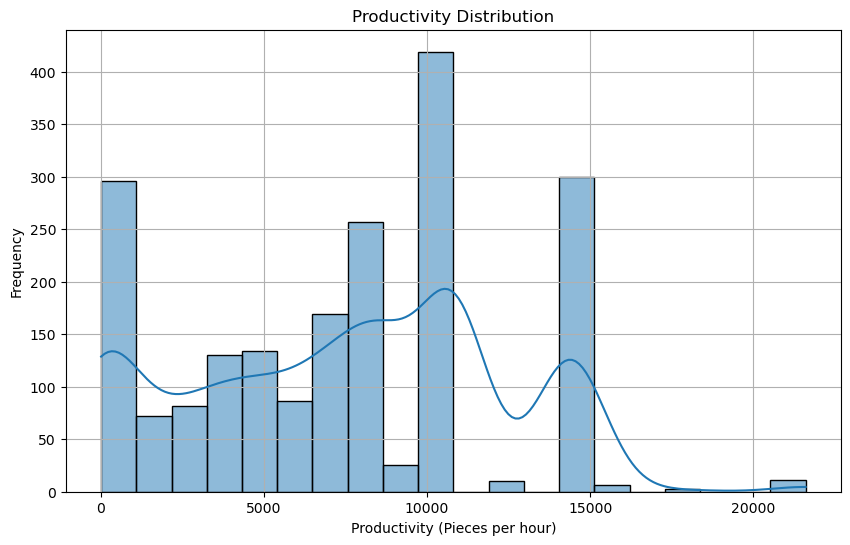

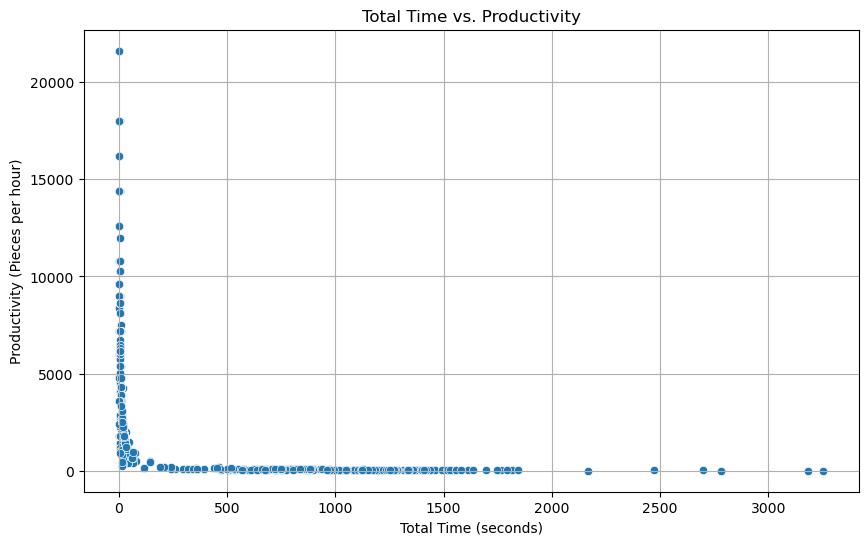

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

operator_tracking = pd.read_csv('D:\case study/operator_tracking.csv')
styles_operation_list= pd.read_csv('D:\case study/styles_operation_list.csv')

# Merge operator tracking data with styles operation list to get operation details
operator_tracking = pd.merge(operator_tracking, styles_operation_list, on=['style_id', 'operation_id'], how='left')

# Convert 'date' column to datetime format
operator_tracking['date'] = pd.to_datetime(operator_tracking['date'])

# Step 3: Analyze the data
# Check for any missing values
missing_values = operator_tracking.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate productivity metrics
operator_tracking['productivity'] = operator_tracking['complete_piece'] / operator_tracking['total_time'] * 3600  # Pieces per hour

# Step 4: Visualize the findings

# Plot 1: Productivity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(operator_tracking['productivity'], bins=20, kde=True)
plt.title('Productivity Distribution')
plt.xlabel('Productivity (Pieces per hour)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Total Time vs. Productivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_time', y='productivity', data=operator_tracking)
plt.title('Total Time vs. Productivity')
plt.xlabel('Total Time (seconds)')
plt.ylabel('Productivity (Pieces per hour)')
plt.grid(True)
plt.show()

# Step 5: Provide actionable insights

# Plot 3: Identify bottlenecks in the production process (Operation Sequence)
operation_sequence = styles_operation_list.groupby('style_id')['sort_order'].apply(list).reset_index()
plt.figure(figsize=(10, 6))
for index, row in operation_sequence.iterrows():
    plt.plot(row['sort_order'], label=row['style_id'])
plt.title('Operation Sequence')
plt.xlabel('Operation Sort Order')
plt.ylabel('Style ID')
plt.legend(title='Style ID')
plt.grid(True)
plt.show()

# Plot 4: Identify operators with low productivity
low_productivity_operators = operator_tracking.groupby('operator_id')['productivity'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=low_productivity_operators.index, y=low_productivity_operators.values)
plt.title('Top 10 Low Productivity Operators')
plt.xlabel('Operator ID')
plt.ylabel('Mean Productivity (Pieces per hour)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 6: Find the machine for each operation
# Merge operator tracking data with styles operation list to get machine information
operator_tracking_with_machine = pd.merge(operator_tracking, styles_operation_list[['operation_id', 'machine_id']], on='operation_id', how='left')

# Now you have the machine_id associated with each operation in the operator_tracking DataFrame
print(operator_tracking_with_machine[['operation_id', 'machine_id']])